# FRUIT CLASSIFIER - MACHINE LEARNING PIPELINE

# Objective:
# Build, train, evaluate and save a CNN model that classifies
# fruits (apple, avocado, banana, cucumber, eggplant, mango,
# onion, orange) from images.

1. IMPORT LIBRARIES

In [1]:
import sys
import os

# Add the parent directory to the path so we can import src
sys.path.insert(0, os.path.abspath('..'))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from src.model import create_cnn_model

2. DEFINE DIRECTORIES & PARAMETERS

In [2]:
train_dir = "../data/training"
test_dir = "../data/test"

img_size = (100, 100)
batch_size = 32
epochs = 20  # Increased epochs for better training
learning_rate = 0.001

3. DATA PREPROCESSING

Found 4966 images belonging to 8 classes.
Found 2495 images belonging to 8 classes.
Found 2495 images belonging to 8 classes.


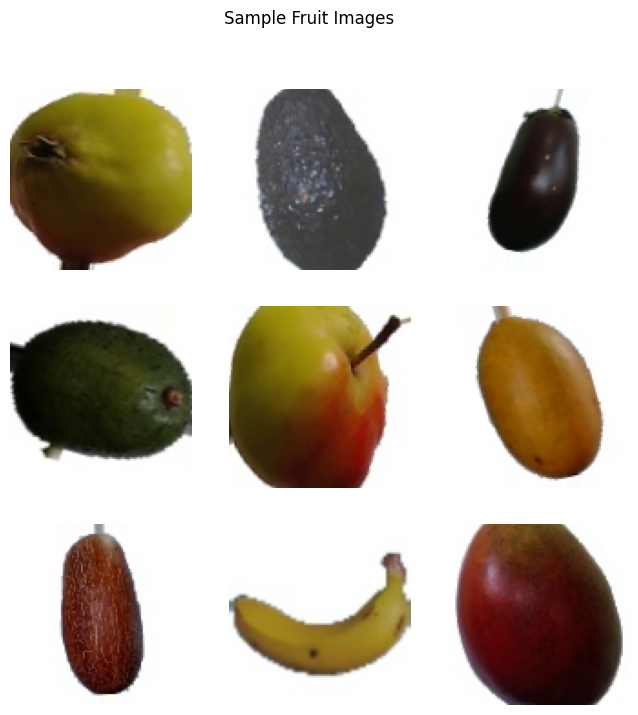

In [3]:
# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directories
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Visualize sample images
x_batch, y_batch = next(train_data)
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle("Sample Fruit Images")
plt.show()

4. MODEL CREATION

In [4]:
input_shape = (100, 100, 3)
num_classes = len(train_data.class_indices)

print(f"Number of classes: {num_classes}")
print(f"Classes: {list(train_data.class_indices.keys())}")

model = create_cnn_model(input_shape, num_classes)
model.summary()

Number of classes: 8
Classes: ['apple', 'avocado', 'banana', 'cucumber', 'eggplant', 'mango', 'onion', 'orange']


C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,374,280 (12.87 MB)

 Trainable params: 3,373,320 (12.87 MB)

 Non-trainable params: 960 (3.75 KB)

5. MODEL TRAINING

In [5]:
# Define callbacks for optimization
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7)

# Train the model with optimization techniques
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)

# Save model
os.makedirs("../models", exist_ok=True)
model.save("../models/fruit_classifier.h5")
print("Model saved successfully.")

Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9253 - loss: 0.9471 - val_accuracy: 0.2842 - val_loss: 10.1748 - learning_rate: 0.0010
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.9253 - loss: 0.9471 - val_accuracy: 0.2842 - val_loss: 10.1748 - learning_rate: 0.0010
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 72s 461ms/step - accuracy: 0.9809 - loss: 0.6508 - val_accuracy: 0.2798 - val_loss: 10.0054 - learning_rate: 0.0010
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 72s 461ms/step - accuracy: 0.9809 - loss: 0.6508 - val_accuracy: 0.2798 - val_loss: 10.0054 - learning_rate: 0.0010
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 74s 475ms/step - accuracy: 0.9849 - loss: 0.5191 - val_accuracy: 0.2409 - val_loss: 7.5477 - learning_rate: 0.0010
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 74s 475ms/step - accuracy: 0.9849 - loss: 0.5191 - val_accuracy: 0.2409 - val_loss: 7.5477 - learning_rate: 0.0010
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 77s 494ms/step - accuracy: 0.9

Model saved successfully.


6. MODEL EVALUATION

In [6]:
# Generate predictions
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes

print('='*60)
print('DETAILED MODEL EVALUATION METRICS')
print('='*60)

# 1. Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'\n1. Accuracy Score: {accuracy:.4f}')

# 2. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print(f'\n2. Confusion Matrix:')
print(cm)

# 3. Classification Report (Precision, Recall, F1-Score)
target_names = list(test_data.class_indices.keys())
print(f'\n3. Classification Report (Precision, Recall, F1-Score):')
print(classification_report(y_true, y_pred, target_names=target_names))

# 4. Macro-average F1 Score
f1_macro = f1_score(y_true, y_pred, average='macro')
print(f'\n4. Macro-Average F1 Score: {f1_macro:.4f}')

# 5. Weighted-average F1 Score
f1_weighted = f1_score(y_true, y_pred, average='weighted')
print(f'\n5. Weighted-Average F1 Score: {f1_weighted:.4f}')

# 6. Per-class Precision and Recall
precision_per_class = precision_score(y_true, y_pred, average=None)
recall_per_class = recall_score(y_true, y_pred, average=None)

print(f'\n6. Per-Class Precision and Recall:')
for i, class_name in enumerate(target_names):
    print(f'   {class_name}: Precision={precision_per_class[i]:.4f}, Recall={recall_per_class[i]:.4f}')

print('='*60)

78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step
DETAILED MODEL EVALUATION METRICS

1. Accuracy Score: 0.1263

2. Confusion Matrix:
[[101  93  91  59  26  85 109  36]
 [ 54  26  46  18  10  33  57  17]
 [ 81  50  53  39  20  48  75  27]
 [ 50  33  27  17  13  21  43  15]
 [ 35  17  21  15   7  16  35  10]
 [ 70  53  48  39  20  44  58  20]
 [ 66  44  58  39  15  46  59  27]
 [ 34  16  20  18   7  21  36   8]]

3. Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

       apple       0.21      0.17      0.19       600
     avocado       0.08      0.10      0.09       261
      banana       0.15      0.13      0.14       393
    cucumber       0.07      0.08      0.07       219
    eggplant       0.06      0.04      0.05       156
       mango       0.14      0.12      0.13       352
       onion       0.12      0.17      0.14       354
      orange       0.05      0.05      0.05       160

    accurac

7. TEST SINGLE IMAGE PREDICTION

7.1. CONFUSION MATRIX VISUALIZATION

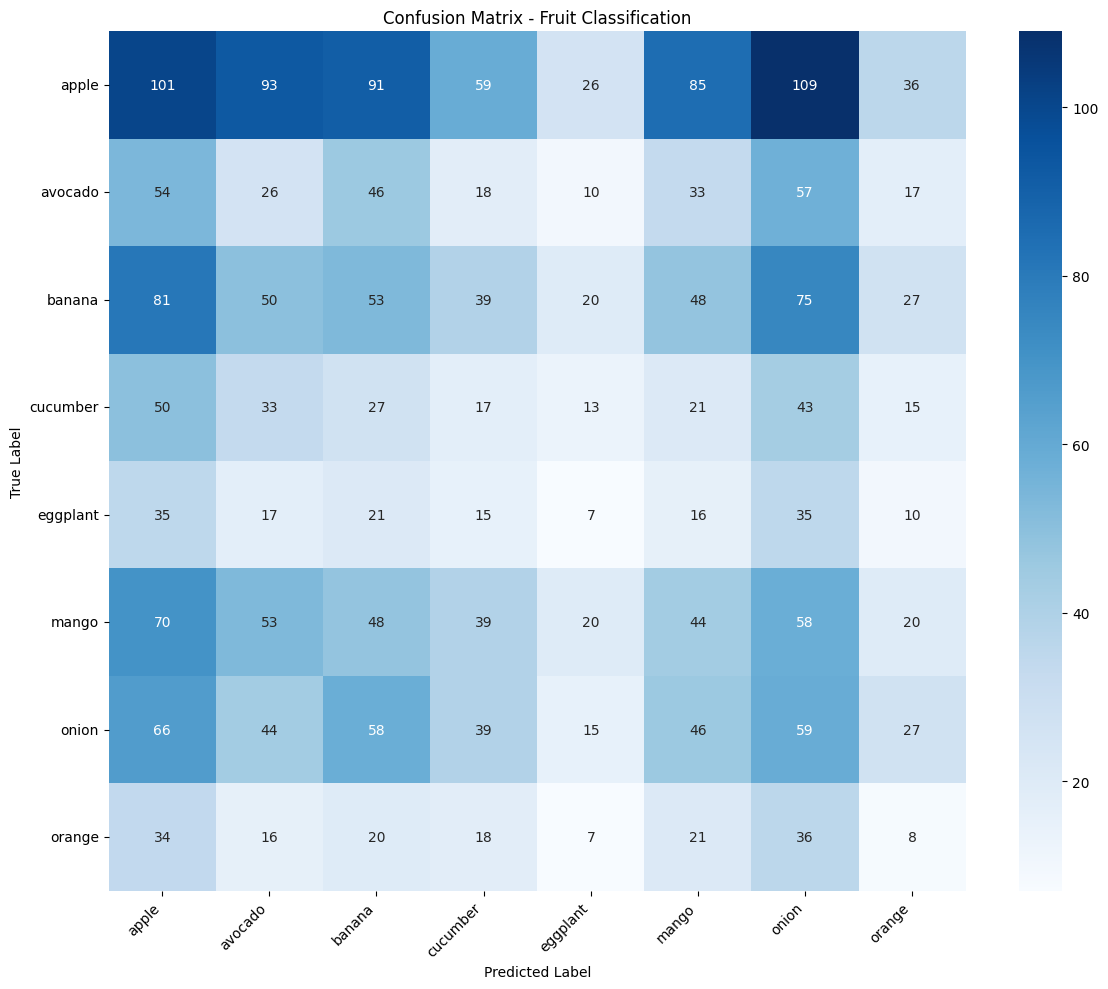

In [7]:
# Visualize Confusion Matrix
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Fruit Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


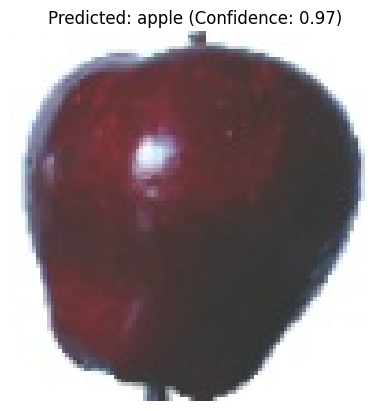

In [9]:
from src.prediction import predict_image

# Choose any image path from your test folder
img_path = "../data/test/apple/0_100.jpg"  # change this as needed
class_idx, prediction, confidence = predict_image("../models/fruit_classifier.h5", img_path)

# Display the image and prediction
plt.imshow(plt.imread(img_path))
plt.axis('off')
pred_class = list(train_data.class_indices.keys())[class_idx]
plt.title(f"Predicted: {pred_class} (Confidence: {confidence:.2f})")
plt.show()

8. SAVE TRAINING HISTORY VISUALIZATION (OPTIONAL)

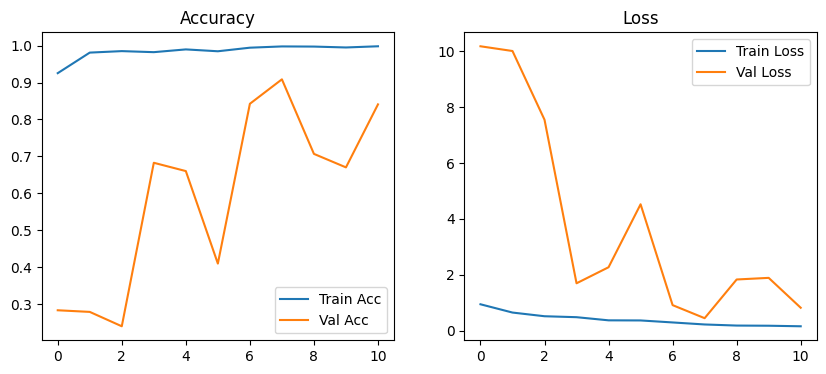

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()